Latar belakang PT. Transjakarta sedang melakukan subsidize campaign demi meningkatkan penggunaan transportasi umum dan memberikan keringanan bagi beberapa orang untuk menggunakan transjakarta
Pernyataan masalah Perusahaan ingin mengetahui seberapa besar dampak campaign yang mereka lakukan terhadap cashflow di perusahaan, beberapa pernyataan yang perlu dijawab adalah: 1. Seberapa banyak pengguna yang memanfaaatkan campaign ini ? 2. Seberapa besar dampak secara finansial dari campaign ini terhadap perusahaan ? 3. Apakah masuk akal untuk melanjutkan campaign ini pada bulan berikutnya ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Load data

df = pd.read_csv('Transjakarta.csv')  # Replace 'Transjakarta.csv' with your file path
display(df.head(),df.tail())

# Display initial data info
print("Initial Data Info:")
print(df.info())
print("\n")



,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   365

In [2]:
display(df.describe, df.describe(include='object'))

<bound method NDFrame.describe of               transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F          

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [8]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
    
tabel1Desc = pd.DataFrame(columns=['columns', 'Number of Unique', 'Unique Sample'], data=listItem)

In [9]:
df.isna()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [14]:
df.isna().sum()/df.shape[1]*100

transid             0.0
paycardid           0.0
paycardbank         0.0
paycardname         0.0
paycardsex          0.0
paycardbirthdate    0.0
corridorid          0.0
corridorname        0.0
direction           0.0
tapinstops          0.0
tapinstopsname      0.0
tapinstopslat       0.0
tapinstopslon       0.0
stopstartseq        0.0
tapintime           0.0
tapoutstops         0.0
tapoutstopsname     0.0
tapoutstopslat      0.0
tapoutstopslon      0.0
stopendseq          0.0
tapouttime          0.0
payamount           0.0
dtype: float64

In [15]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)# 3. Normalize Column Names
# Convert all column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.dropna()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [22]:
df['z_score'] = (df['payamount'] - df['payamount'].mean()) / df['payamount'].std()

# Identifying outliers
outliers = df[np.abs(df['z_score']) > 3]

print(outliers)

              transid         paycardid paycardbank  \
5      DDES630K2F80KC  2251412124634980  dki          
8      OIHS248V7S72EB  6510013988638519  dki          
117    YTOA058V9U73VN  4709994160903     online       
134    ESJQ990H8Q22LV  345711968178505   emoney       
212    TNYA703K8B81VC  213129225555184   emoney       
...               ...              ...      ...       
37829  WKIT490S3J82GY  6011018350339285  dki          
37854  AMQA420I2P82KP  3553882732550120  dki          
37879  LVSU593P5B50VF  30480183587078    bni          
37888  KWQA944F9O89IN  6585885975007109  dki          
37897  YXPP627N4G95HO  213159426675861   emoney       

                         paycardname paycardsex  paycardbirthdate corridorid  \
5      Tirta Siregar                  F          1993              1T          
8      Cagak Maheswara, S.Sos         F          1992              B14         
117    Cut Gabriella Haryanti, S.Sos  M          1974              T21         
134    Kawaya Oktav

In [26]:
# Removing multiple columns by passing a list of column names
df.drop(['transid', 'paycardid', 'paycardname','corridorname' ], axis=1, inplace=True)
#Display the DataFrame after removing the columns
print(df.head())

  paycardbank paycardsex  paycardbirthdate corridorid  direction tapinstops  \
0  emoney      M          2008              5          1.0        P00142      
1  dki         F          1997              6C         0.0        B01963P     
2  dki         F          1992              R1A        0.0        B00499P     
3  flazz       F          1978              11D        0.0        B05587P     
4  flazz       M          1982              12         0.0        P00239      

           tapinstopsname  tapinstopslat  tapinstopslon  stopstartseq  \
0  Pal Putih              -6.184631       106.84402      7              
1  Kemenkes 2             -6.228700       106.83302      13             
2  Gg. Kunir II           -6.133132       106.81435      38             
3  Taman Elok 1           -6.195743       106.93526      23             
4  Sunter Boulevard Barat -6.149650       106.88900      5              

             tapintime tapoutstops        tapoutstopsname  tapoutstopslat  \
0  2023-0

In [27]:
print(df.head())

  paycardbank paycardsex  paycardbirthdate corridorid  direction tapinstops  \
0  emoney      M          2008              5          1.0        P00142      
1  dki         F          1997              6C         0.0        B01963P     
2  dki         F          1992              R1A        0.0        B00499P     
3  flazz       F          1978              11D        0.0        B05587P     
4  flazz       M          1982              12         0.0        P00239      

           tapinstopsname  tapinstopslat  tapinstopslon  stopstartseq  \
0  Pal Putih              -6.184631       106.84402      7              
1  Kemenkes 2             -6.228700       106.83302      13             
2  Gg. Kunir II           -6.133132       106.81435      38             
3  Taman Elok 1           -6.195743       106.93526      23             
4  Sunter Boulevard Barat -6.149650       106.88900      5              

             tapintime tapoutstops        tapoutstopsname  tapoutstopslat  \
0  2023-0

=======================DATA ANALYSIS===================================


=================DATA PENGGUNA YANG NON FREE============================

In [65]:
paid = df[df['payamount'] != 0]
print(paid.head())
print('-----------------------------------------------------')

paid_count = paid.shape[0]
print(paid_count)

  paycardbank paycardsex  paycardbirthdate corridorid  direction tapinstops  \
0  emoney      M          2008              5          1.0        P00142      
1  dki         F          1997              6C         0.0        B01963P     
2  dki         F          1992              R1A        0.0        B00499P     
3  flazz       F          1978              11D        0.0        B05587P     
4  flazz       M          1982              12         0.0        P00239      

           tapinstopsname  tapinstopslat  tapinstopslon  stopstartseq  \
0  Pal Putih              -6.184631       106.84402      7              
1  Kemenkes 2             -6.228700       106.83302      13             
2  Gg. Kunir II           -6.133132       106.81435      38             
3  Taman Elok 1           -6.195743       106.93526      23             
4  Sunter Boulevard Barat -6.149650       106.88900      5              

             tapintime tapoutstops        tapoutstopsname  tapoutstopslat  \
0  2023-0

===================DATA PENGGUNA YANG FREE============================

In [83]:
not_paid = df[df['payamount'] == 0]
print(not_paid.head())

notpaidsum = not_paid.shape[0]
print('-----------------------------------------------------')

print(notpaidsum)

   paycardbank paycardsex  paycardbirthdate corridorid  direction tapinstops  \
14  online      M          1975              JAK.46     1.0        B00608P     
19  dki         M          1981              JAK.88     0.0        B00722P     
24  dki         F          1981              JAK.02     0.0        B05023P     
27  dki         F          1979              3B         0.0        B06299P     
36  flazz       F          1989              BW9        1.0        B02476P     

                    tapinstopsname  tapinstopslat  tapinstopslon  \
14  Gelanggang Remaja Pasar Minggu -6.284615       106.837870      
19  Gunung Sahari Mangga Dua Timur -6.137032       106.832540      
24  Simpang Pahlawan Revolusi 1    -6.238658       106.899461      
27  Jln. Kayu Besar Dalam          -6.122739       106.731290      
36  Monas 2                        -6.175999       106.823110      

    stopstartseq            tapintime tapoutstops     tapoutstopsname  \
14  5             2023-04-03 05:38:44

===========DATA PENGGUNA BERBAYAR BERDASARKAN METODE PEMBAYARAN=================

In [66]:
payment_by_method = df.groupby('paycardbank')['payamount'].sum()
pbmSorted = payment_by_method.sort_values(ascending=False)
print(pbmSorted)

paycardbank
dki       38860000.0
emoney    17797000.0
brizzi    10431500.0
flazz     7584500.0 
online    5919000.0 
bni       5767000.0 
Name: payamount, dtype: float64


In [64]:
PaidByMethod = paid['paycardbank'].value_counts()
print(PaidByMethod)

paycardbank
dki       8180
emoney    3383
brizzi    1750
flazz     1672
bni       1280
online    1182
Name: count, dtype: int64


In [103]:
nonpaidbymethod = not_paid['paycardbank'].value_counts(ascending=False).head()
print(nonpaidbymethod)

paycardbank
dki       7522
emoney    2430
online    1182
brizzi    1172
flazz     995 
Name: count, dtype: int64


========================DATA PENGGUNA BERBAYAR LOKASI===============================

In [67]:
payment_by_location = df.groupby('tapinstopsname')['payamount'].sum()
pblSorted = payment_by_location.sort_values(ascending=False).head()
print(pblSorted)

tapinstopsname
Bundaran Senayan 1     1559500.0
Gelora Bung Karno 1    1539500.0
Bintaro Xchange        1220000.0
St. MRT Fatmawati      1207000.0
Kemenkes 2             1139500.0
Name: payamount, dtype: float64


In [70]:
PaidByTapin = paid['tapinstopsname'].value_counts()
print(PaidByTapin)
print('-----------------------------------------------------')

tapinstopsname
Garuda Taman Mini              180
BKN                            149
BNN LRT                        139
Pejaten                        133
Seskoal                        112
                              ... 
Permata Hijau RS Medika 2      1  
IRTI                           1  
Rest Area Cibubur              1  
Konsil Kedokteran Indonesia    1  
Term. Muara Angke 1            1  
Name: count, Length: 1031, dtype: int64
-----------------------------------------------------


In [104]:
NotPaidByTapin = not_paid['tapinstopsname'].value_counts(ascending=False).head()
print('-----------------------------------------------------')
print(NotPaidByTapin)

-----------------------------------------------------
tapinstopsname
Rusun Kapuk Muara         108
Penjaringan               105
Penggilingan              101
Walikota Jakarta Timur    55 
Rusun Pesakih             55 
Name: count, dtype: int64


===========DATA PENGGUNA BERBAYAR BERDASARKAN METODE USIA=================

In [78]:
payment_by_age = df.groupby('paycardbirthdate')['payamount'].sum()
pbaSorted = payment_by_age.sort_values(ascending=False).head()
print(pbaSorted)

paycardbirthdate
1986    4728000.0
1992    4481000.0
1985    3711000.0
1987    3668500.0
1995    3391000.0
Name: payamount, dtype: float64


In [79]:
PaidByAge = paid['paycardbirthdate'].value_counts()
print(PaidByAge)
print('-----------------------------------------------------')

paycardbirthdate
1992    757
1987    704
1996    632
1981    583
1985    537
       ... 
1948    2  
1964    2  
1958    1  
1954    1  
1956    1  
Name: count, Length: 66, dtype: int64
-----------------------------------------------------


In [112]:
NotPaidByAge = not_paid['paycardbirthdate'].value_counts()
print('-----------------------------------------------------')
print(NotPaidByAge)

-----------------------------------------------------
paycardbirthdate
0-18     0
19-30    0
31-50    0
51+      0
Name: count, dtype: int64


In [80]:
payment_by_seq = df.groupby('stopstartseq')['payamount'].sum()
pbsSorted = payment_by_seq.sort_values(ascending=False).head()
print(pbsSorted)
print('------------------------')

stopstartseq
0     9741000.0
2     5565500.0
11    5325500.0
5     5128500.0
3     4976500.0
Name: payamount, dtype: float64
------------------------


In [81]:
PaidBySeq = paid['stopstartseq'].value_counts()
print(PaidBySeq)
print('-----------------------------------------------------')

stopstartseq
0     1515
2     1048
5     975 
4     954 
1     912 
11    904 
8     863 
6     861 
9     860 
7     795 
3     776 
10    680 
13    676 
15    660 
14    605 
12    490 
17    474 
16    441 
19    357 
18    328 
20    297 
21    290 
23    199 
25    162 
29    150 
24    148 
22    141 
26    132 
31    123 
38    75  
30    69  
35    68  
36    58  
33    55  
28    53  
34    35  
32    32  
27    29  
47    23  
46    20  
45    19  
42    19  
44    18  
41    18  
43    10  
39    10  
50    7   
49    6   
40    4   
37    3   
Name: count, dtype: int64
-----------------------------------------------------


In [107]:
NotPaidBySeq = not_paid['stopstartseq'].value_counts(ascending=False).head()
print('-----------------------------------------------------')
print(NotPaidBySeq)

-----------------------------------------------------
stopstartseq
0    962
2    666
3    565
5    518
4    497
Name: count, dtype: int64


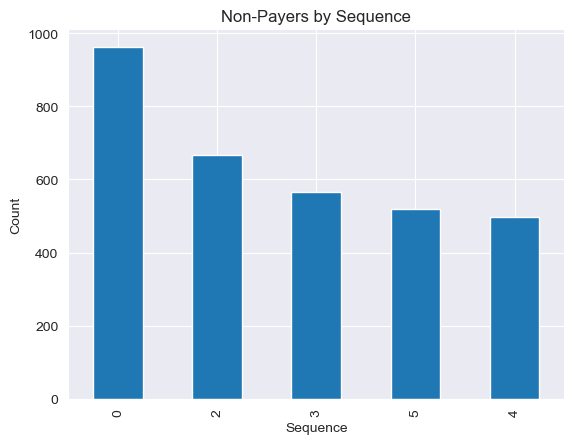

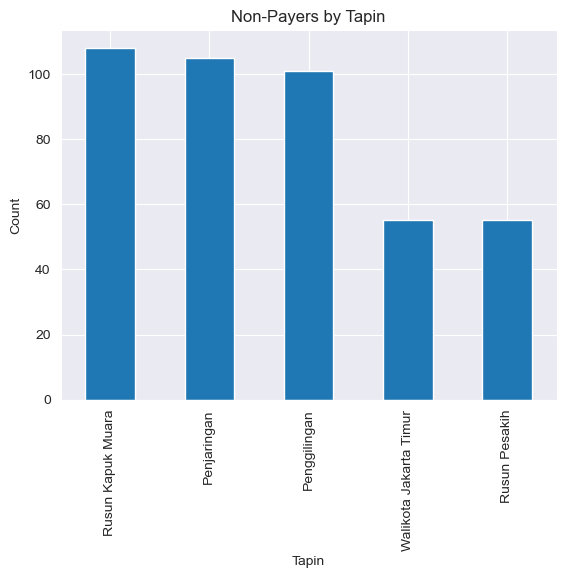

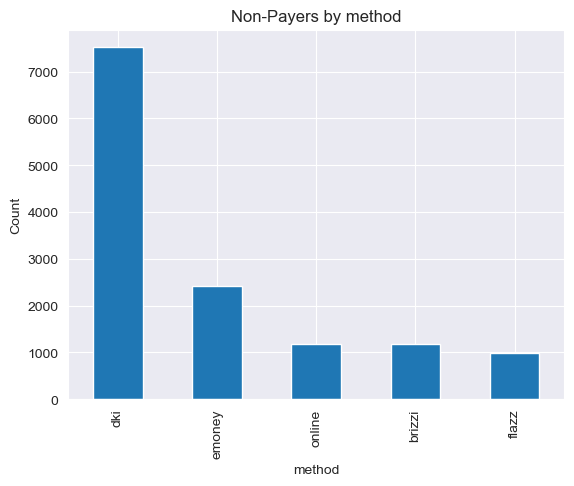

In [114]:
NotPaidBySeq.plot(kind='bar', title='Non-Payers by Sequence', xlabel='Sequence', ylabel='Count')
plt.show()

NotPaidBySeq.plot(kind='bar', title='Non-Payers by Sequence', xlabel='Sequence', ylabel='Count')
plt.show()


NotPaidByTapin.plot(kind='bar', title='Non-Payers by Tapin', xlabel='Tapin', ylabel='Count')
plt.show()

nonpaidbymethod.plot(kind='bar', title='Non-Payers by method', xlabel='method', ylabel='Count')
plt.show()
